<h1><div align="center">Deep Learning From Scratch</div></h1>
<h2><div align="center">Forward Propagation</div></h2>
<div align="center">Bruno Gonçalves</div>
<div align="center"><a href="http://www.data4sci.com/">www.data4sci.com</a></div>
<div align="center">@bgoncalves</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -n -v -m -p numpy,matplotlib,pandas,seaborn

Fri Apr 19 2019 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
matplotlib 3.0.3
pandas 0.24.2
seaborn 0.9.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 18.2.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


## Load saved data

In [3]:
X_train = np.load('input/X_train.npy')
X_test = np.load('input/X_test.npy')
y_train = np.load('input/y_train.npy')
y_test = np.load('input/y_test.npy')

## Activation functions

We start by setting up the range of the input values we'll use for vizualization purposes

In [4]:
z = np.linspace(-6, 6, 100)

### Linear

In [5]:
def linear(z):
    return z

def linearGradient(z):
    return np.ones(z.shape)

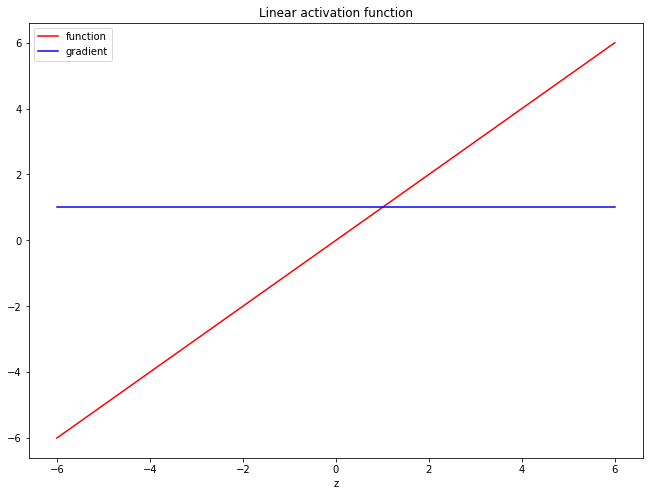

In [6]:
plt.plot(z, linear(z), 'r-')
plt.plot(z, linearGradient(z), 'b-')
plt.xlabel('z')
plt.title('Linear activation function')
plt.legend(['function', 'gradient'])
plt.gcf().set_size_inches(11, 8)

### Sigmoid

In [7]:
def sigmoid(z):
    return 1./(1+np.exp(-z))

def sigmoidGradient(z):
    h = sigmoid(z)
    return h*(1-h)

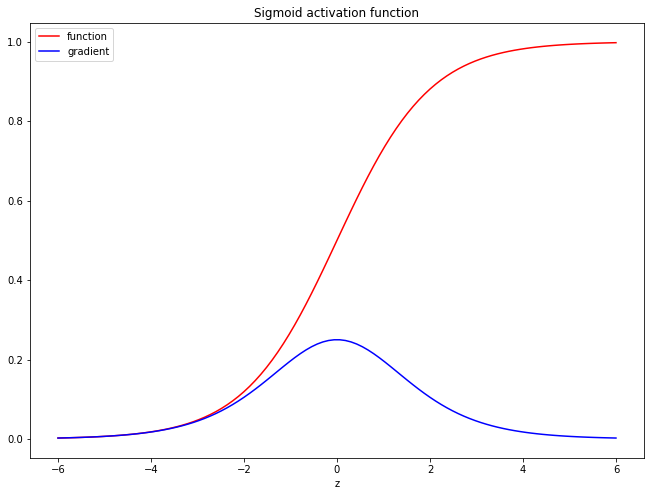

In [8]:
plt.plot(z, sigmoid(z), 'r-')
plt.plot(z, sigmoidGradient(z), 'b-')
plt.legend(['function', 'gradient'])
plt.xlabel('z')
plt.title('Sigmoid activation function')
plt.gcf().set_size_inches(11, 8)

### Rectified Linear

In [9]:
def relu(z):
    return np.where(z > 0, z, 0)


def reluGradient(z):
    return np.where(z > 0, 1, 0)

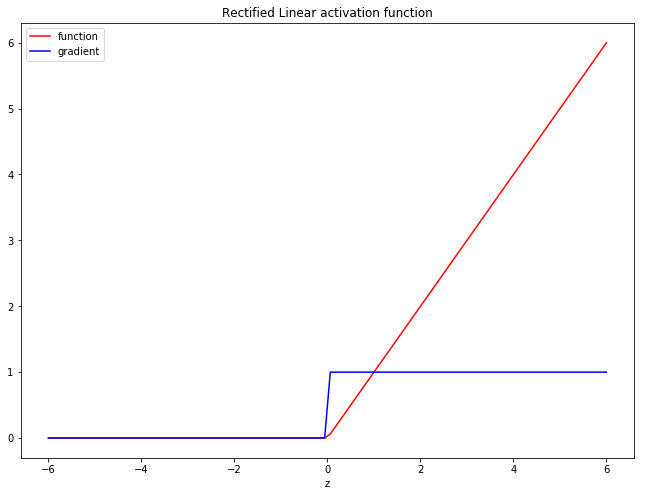

In [10]:
plt.plot(z, relu(z), 'r-')
plt.plot(z, reluGradient(z), 'b-')
plt.legend(['function', 'gradient'])
plt.xlabel('z')
plt.title('Rectified Linear activation function')
plt.gcf().set_size_inches(11, 8)

### Hyperbolic Tangent

In [11]:
def tanh(z):
    return np.tanh(z)


def tanhGradient(z):
    return 1-np.power(tanh(z), 2.0)

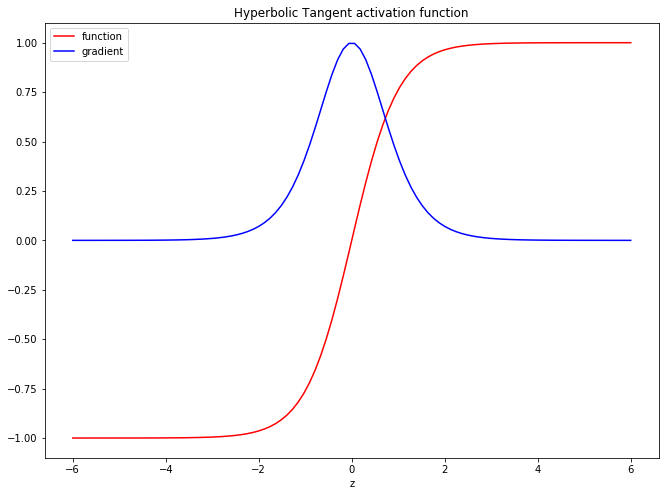

In [12]:
plt.plot(z, tanh(z), 'r-')
plt.plot(z, tanhGradient(z), 'b-')
plt.legend(['function', 'gradient'])
plt.xlabel('z')
plt.title('Hyperbolic Tangent activation function')
plt.gcf().set_size_inches(11, 8)

## Load weights

These were previously trained. Loading them here for simplicity and we'll go over the training procedure in a bit

In [13]:
Theta1 = np.load('input/Theta1.npy')
Theta2 = np.load('input/Theta2.npy')

## Forward propagation

In [14]:
def forward(Theta, X, active):
    N = X.shape[0]

    # Add the bias column
    X_ = np.concatenate((np.ones((N, 1)), X), 1)

    # Multiply by the weights
    z = np.dot(X_, Theta.T)

    # Apply the activation function
    a = active(z)

    return a

## Predict function

The predict function effectively implements the actual model. It forward propagates the inputs through all the layers will the correct activation functions at each step and returns the final output

In [15]:
def predict(Theta1, Theta2, X):
    h1 = forward(Theta1, X, sigmoid)
    h2 = forward(Theta2, h1, sigmoid)

    return np.argmax(h2, 1)

## Check Accuracy

The accuracy is just the fraction of correctly predicted results

In [16]:
def accuracy(y_, y):
    return np.mean((y_ == y.flatten()))*100.

In [17]:
y_ = predict(Theta1, Theta2, X_train)

print(accuracy(y_, y_train))

92.12
